Epoch 1/20
235/235 [==============================] - 6s 27ms/step - loss: 0.2731 - accuracy: 0.9151 - val_loss: 0.1471 - val_accuracy: 0.9523
Epoch 2/20
235/235 [==============================] - 7s 30ms/step - loss: 0.0938 - accuracy: 0.9708 - val_loss: 0.1004 - val_accuracy: 0.9674
Epoch 3/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0583 - accuracy: 0.9816 - val_loss: 0.0813 - val_accuracy: 0.9771
Epoch 4/20
235/235 [==============================] - 6s 26ms/step - loss: 0.0403 - accuracy: 0.9873 - val_loss: 0.0751 - val_accuracy: 0.9781
Epoch 5/20
235/235 [==============================] - 7s 28ms/step - loss: 0.0284 - accuracy: 0.9911 - val_loss: 0.0914 - val_accuracy: 0.9752
Epoch 6/20
235/235 [==============================] - 6s 27ms/step - loss: 0.0221 - accuracy: 0.9928 - val_loss: 0.0778 - val_accuracy: 0.9797
Epoch 7/20
235/235 [==============================] - 6s 27ms/step - loss: 0.0159 - accuracy: 0.9949 - val_loss: 0.0735 - val_accuracy: 0.9825

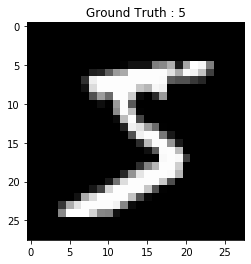

In [3]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
# plt.show()

#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

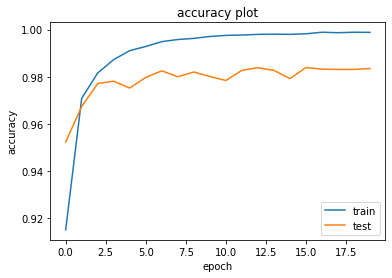

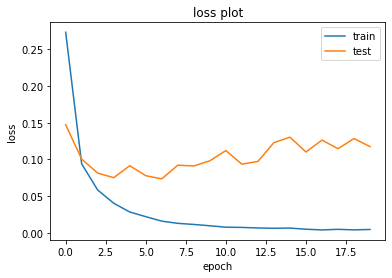

In [4]:
#accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

#loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

[[2.1744219e-15 2.4915184e-11 4.1281793e-18 1.0867846e-09 1.7250551e-10
  4.0957263e-10 1.5204785e-21 1.2501445e-05 1.4619084e-11 9.9998748e-01]]
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[9]


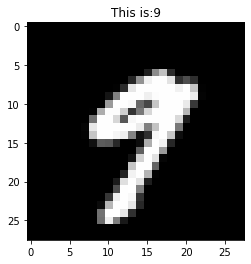

In [5]:
#loading and predicting the model
predictions = model.predict(test_data[[20],:])
print(predictions)

predict_classes = model.predict_classes(test_data[[20],:])
print(predict_classes)

plt.imshow(test_images[20], cmap = 'gray')
plt.title("This is:" + str(predict_classes[0]))
plt.show()

In [6]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()


#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
# Adding hidden layers
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(60, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=5, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/5
235/235 [==============================] - 8s 33ms/step - loss: 0.4087 - accuracy: 0.9035 - val_loss: 0.1715 - val_accuracy: 0.9539
Epoch 2/5
235/235 [==============================] - 6s 26ms/step - loss: 0.1135 - accuracy: 0.9687 - val_loss: 0.0995 - val_accuracy: 0.9709
Epoch 3/5
235/235 [==============================] - 8s 32ms/step - loss: 0.0700 - accuracy: 0.9804 - val_loss: 0.0936 - val_accuracy: 0.9714
Epoch 4/5
235/235 [==============================] - 8s 35ms/step - loss: 0.0503 - accuracy: 0.9857 - val_loss: 0.1201 - val_accuracy: 0.9659
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0878 - accuracy: 0.9761
Evaluation result on Test Data : Loss = 0.0878492221236229, accuracy = 0.9761000275611877


In [7]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()


#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
# train_data /=255.0
# test_data /=255.0
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))


Epoch 1/20
235/235 [==============================] - 9s 37ms/step - loss: 6.2175 - accuracy: 0.8747 - val_loss: 0.7779 - val_accuracy: 0.9236
Epoch 2/20
235/235 [==============================] - 7s 31ms/step - loss: 0.4232 - accuracy: 0.9471 - val_loss: 0.4221 - val_accuracy: 0.9453
Epoch 3/20
235/235 [==============================] - 8s 35ms/step - loss: 0.2638 - accuracy: 0.9595 - val_loss: 0.5391 - val_accuracy: 0.9235
Epoch 4/20
235/235 [==============================] - 9s 37ms/step - loss: 0.1958 - accuracy: 0.9678 - val_loss: 0.4529 - val_accuracy: 0.9501
Epoch 5/20
235/235 [==============================] - 7s 31ms/step - loss: 0.1751 - accuracy: 0.9722 - val_loss: 0.2822 - val_accuracy: 0.9610
Epoch 6/20
235/235 [==============================] - 9s 37ms/step - loss: 0.1506 - accuracy: 0.9768 - val_loss: 0.3092 - val_accuracy: 0.9651
Epoch 7/20
235/235 [==============================] - 8s 32ms/step - loss: 0.1466 - accuracy: 0.9784 - val_loss: 0.3571 - val_accuracy: 0.9596